In [1]:
#!pip install wordcloud

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [7]:
df.columns=["Class","Text"]

In [8]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import seaborn as sns

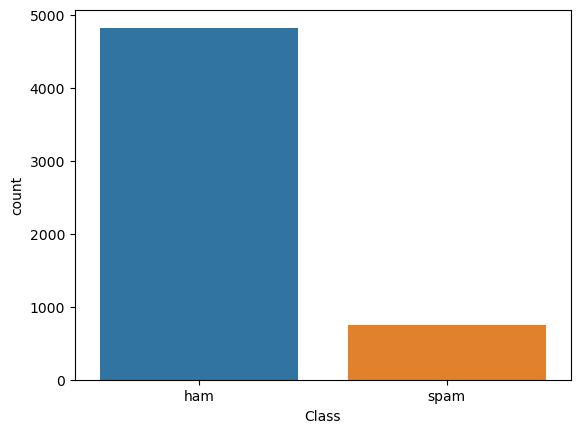

In [10]:
sns.countplot(x=df["Class"]);

In [11]:
df["Class"].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [12]:
d={'ham':0,'spam':1}

In [13]:
df['Class']=df["Class"].map(d)

In [15]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','')
df['Text']=df['Text'].str.replace('\n','')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\r','')

In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [38]:
import matplotlib.pyplot as plt

In [105]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [106]:
ham=df[df["Class"]==0]["Text"]
spam=df[df["Class"]==1]["Text"]

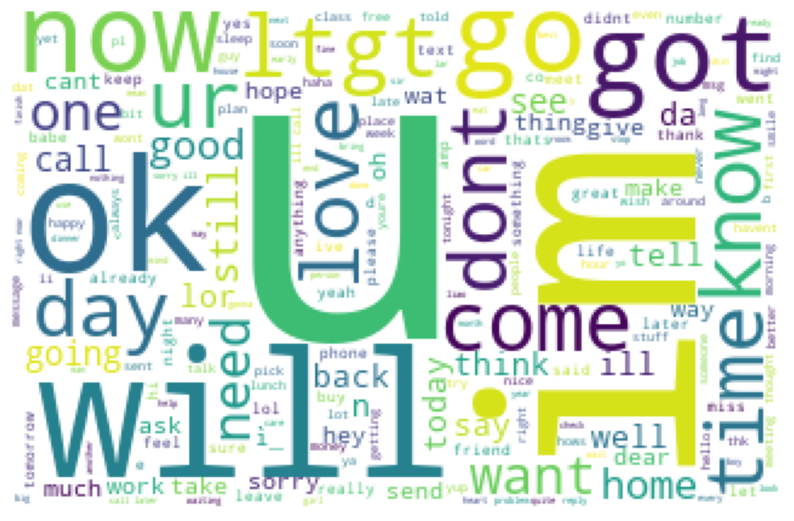

In [107]:
wc(ham,'white')

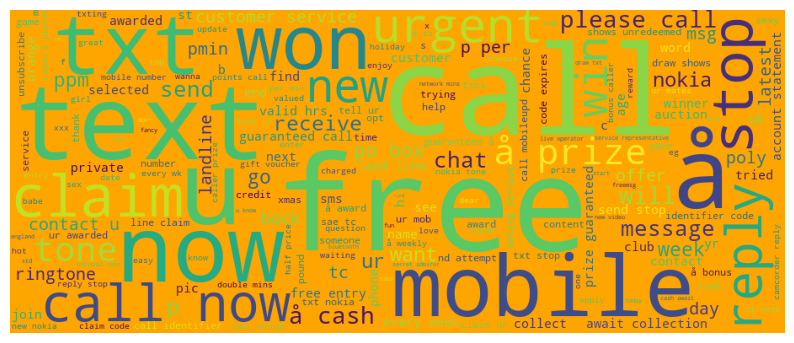

In [99]:
wc(spam,'orange')

In [49]:
x=df["Text"]
y=df["Class"]

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [83]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [84]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),analyzer=lemmafn)

In [90]:
x=vect.fit_transform(x)

In [91]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=42,test_size=0.20)

In [92]:
nb=MultinomialNB()

In [93]:
model=nb.fit(x_train,y_train)

In [94]:
tahmin=model.predict(x_test)

In [95]:
accuracy_score(tahmin,y_test)

0.9766816143497757